In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime
import xgboost as xgb

# input file path
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Dataset//Scenario3_EYDC-9K"

In [2]:
# read input file and index file for training and test set
dataset = np.load(workdir + "//200914_EYDC9K.npz")
ss0 = np.load(workdir + '//200914_EYDC9K_r0_9_1.npz')

In [3]:
# input and index file assign
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
# training and test dataset assign
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]


In [5]:
# checking the size of dataset
x.shape

(9590, 41505)

In [6]:
# checking the size of training set
training_image_array.shape

(8631, 41505)

In [7]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array


In [8]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8631, 41505) (8631,) (959, 41505) (959,)


In [9]:
# data typing and the number of dataset
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (8631, 41505)
8631 train samples
959 test samples


In [10]:
# model fitting
StartTime8 = datetime.now()
print("StartTime :", StartTime8)

model = xgb.XGBRegressor()
model.fit(train_X,train_y)
EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2020-09-15 12:36:51.649769
[12:36:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
EndTime : 2020-09-15 12:49:50.692690


In [11]:
test_eval = model.score(test_X,test_y)

In [12]:
test_eval

0.7492848528869769

In [13]:
predicted_classes = model.predict(test_X)

In [14]:
predicted_value = predicted_classes

In [15]:
# saving predicted ln(IC50)s and ln(IC50)s in the test set
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//EYDC-9K"
c.to_csv(workdir + '//200915_EYDC9K_XGB_pred_and_val_result.csv', index=False)


In [16]:
# result table
c.head()

,Predicted,Test
0,-3.875684,-4.667942
1,1.979814,2.079442
2,1.646048,2.079442
3,2.155189,2.079442
4,1.845119,2.079442


In [17]:
# the length of result table
predicted_value.shape

(959,)

In [18]:
# model save
import pickle
from sklearn.externals import joblib
joblib.dump(model, workdir + '//200915_EYDC9K_XGB_model.pkl') 


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//EYDC-9K//200915_EYDC9K_XGB_model.pkl']

In [19]:
import matplotlib
from matplotlib import pyplot as plt

In [20]:
# check whether the saved model is working
regr_from_joblib = joblib.load(workdir + '//200915_EYDC9K_XGB_model.pkl') 
regr_from_joblib.predict(test_X)

[12:49:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([-3.8756838e+00,  1.9798137e+00,  1.6460479e+00,  2.1551890e+00,
        1.8451194e+00, -2.4100387e+00,  1.0895414e+00,  5.6847018e-01,
       -2.7556756e+00,  1.8076346e+00,  7.9667360e-02, -6.4253175e-01,
        2.1598721e+00,  2.0041766e+00,  1.4551692e+00,  1.9214164e+00,
       -1.4130095e+00, -2.2272751e+00,  1.7816632e+00,  1.8475116e+00,
        1.2529615e+00,  1.6521480e+00, -2.1844294e+00, -1.8365428e+00,
        1.2547343e+00,  9.3818450e-01,  1.7731003e+00,  1.8567585e+00,
        1.0856540e+00,  1.6030771e+00, -1.6030908e+00,  6.8167484e-01,
       -2.0604284e+00,  1.4916286e+00,  1.1771276e+00,  1.9834168e+00,
        1.7877225e+00, -9.8749542e-01,  1.0443637e+00,  2.0110297e+00,
        1.5964018e+00,  2.1942639e+00,  4.8101166e-01,  1.6223334e+00,
        1.3091433e+00,  1.5828347e+00,  2.0201669e+00,  1.1569369e+00,
        2.2315221e+00,  1.9891798e+00, -1.1468824e+00,  1.9222404e+00,
        1.9579797e+00,  1.7894238e+00,  1.7957046e+00,  1.1029482e+00,
      

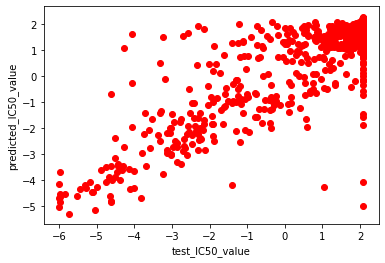

In [21]:
# plotting
plt.scatter(test_label_array,predicted_value,c='red')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//200915_EYDC9K_XGB_plot.png')

In [22]:
# R-squared value
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.7492848528869769


In [23]:
# Linear regression value (slope)
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.7401805544392706, intercept=0.2000605870317671, rvalue=0.8658721596272708, pvalue=4.060285783286987e-290, stderr=0.013823828422792651)

In [24]:
# RMSE
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 0.9880084251135447
